# Directing Customers to Subscription Through Financial App Behavior Analysis 

here the fintech company launches app and want to grow there business , but there is a problem how to recomended this app and offer who really want to use it . 
So for that company desided to give free trail to each and every customer for 24 hours and collect data from the customers in
this senariao some customer purchase the app and someone not according to this data company want to give special offer to 
customer who are not interested to buy without offer and grow there business 

this is classficaiton prob

# Import essential libraries


In [254]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser #convert time in date time data type

In [255]:
finTech_appData=pd.read_csv("FineTech_appData (2).csv")


In [256]:
finTech_appData.shape

(50000, 12)

In [257]:
finTech_appData.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [258]:
#printing screen_list coloumn full 

for i in [0,1,2,3,4,5,6]:
    print(finTech_appData.loc[i,'screen_list'],'\n')

idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login 

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 

product_review,product_review2,ScanPreview 



In [259]:
finTech_appData.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [260]:
#Now understand the whole dtaset  >

#user :unique id 

#first_open :date(yy-mm-dd) and time (hour:minute:sec:millisecond) 

#dayofweek:0-sunday,1-mon,2-tue,3-wed

#hour:24 hour format

#age:registerd user age

#screen_list:name of no.of screens seen by customers 

#numscreens:total no.of screens seen by customers

#minigame:the app contains games related to finance if cutomer play that game then 1 or else 0

#used_premium_feature:if customer used the premium feature of app then 1 or else 0

#enrolled:if user bought a premium feature app then 1 or else 0

#enrolled_date: date (yy-mm--dd) and time (hour:minute:seconds:milliseconds) the user bought a premium features app

#liked:the each screen of app has like button if the customer likes it then 1 or else 0


In [261]:
#finding the null value in dataset
finTech_appData.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [262]:
finTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [263]:
finTech_appData.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [264]:
#From the output, we can know more about the dataset. 
#The mean age of the customer is 31.72. 
#Only 10.7% of customers played minigame and
#17.2% customer used premium features of the app,
#likes 16.5 %. 
#The 62.1% customer enrolled in the premium app

In [265]:
finTech_appData.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [322]:
features = finTech_appData.columns
for i in features:
    
    print("Unique value of {} \n  {} \nlength  is {} \n...............\n"
          .format(i,finTech_appData[i].unique(), len(finTech_appData[i].unique()) )   )



Unique value of user 
  [235136 333588 254414 ... 302367 324905  27047] 
length  is 49874 
...............

Unique value of dayofweek 
  [3 6 1 4 2 0 5] 
length  is 7 
...............

Unique value of hour 
  [ 2  1 19 16 18  9  3 14  4 11  6 21  5 17 20  0 22 10  8 15 13 23 12  7] 
length  is 24 
...............

Unique value of age 
  [ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77  71  74  89  78  86  80  82  79  87  81  85
 101  88  83 100  84  98] 
length  is 78 
...............

Unique value of numscreens 
  [ 15  13   3  40  32  14  41  33  19  25  11   4   9  26   6  20   5   8
  42   1  38  49  35  10  52  50  76  37  16  47  90  24  45  31  39  17
  28  27  57  23  21  12   7  18  48  29 136  34  59  89  22  43  36  56
  30   2  44  92  51  70  58  66  46  55  61  75  71  78  85 

In [267]:
#  hour data convert string to int  >>>  finTech_appData.hour.str.slice(1,3).astype(int)
#

# get data type of each columns
finTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [268]:
finTech_appData['hour']=finTech_appData.hour.str.slice(1,3).astype(int)

In [269]:
#To visualize the data need numeric values for that we drop some columns that datatype is the object.

In [270]:
finTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [271]:
finTech_appData.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [272]:
finTech_appData2 = finTech_appData.drop([ 'user','first_open', 'screen_list', 'enrolled_date'], axis = 1)


finTech_appData2.head(6)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0


# Data Visualization  

In [273]:
finTech_appData2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
...,...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,1,0
49996,1,0,35,4,0,1,0,0
49997,2,22,39,25,0,0,0,0
49998,6,12,27,26,0,0,1,0


Data visualization
#heatmap uses find the correlation btw each and every features using the correlation matrix 

Text(0.5, 1.0, 'Heatmap using correlation matrix of fineTech_appData2')

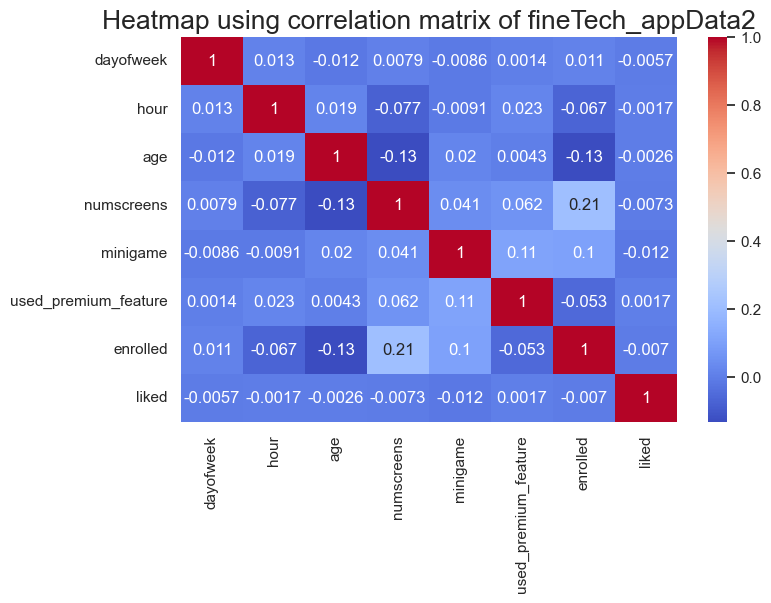

In [274]:
plt.figure(figsize=(8,5))
sns.heatmap(finTech_appData2.corr(),annot=True,cmap='coolwarm')
plt.title("Heatmap using correlation matrix of fineTech_appData2", fontsize = 19) 
# title of heatmap


#In the fineTech_appData2 dataset, there is no strong correlation between any features. 

There is little correlation between ‘numscreens’ and ‘enrolled’. 
[It means that those customers saw more screen they are taking premium app.]

There is a slight correlation between ‘minigame’ with ‘anrolled’ and ‘used_premium_feature’. 

The slightly negative correlation between ‘age’ with ‘enrolled’ and ‘numscreens’.
[ It means that older customers do not use the premium app and they don’t see multiple screens.]

# pairplot  

In [275]:
finTech_appData.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


This illustrate that there is a correlation between 'numscreens' and 'enrolled' this means those customers watch more screen they are taking premium app.
and 
There is a slight correlation between 'minigame " with 'enrolled 'and 'used_premium_feature'.
The slightly negative correlation between 'age' with 'enrolled'and 'numscreens''

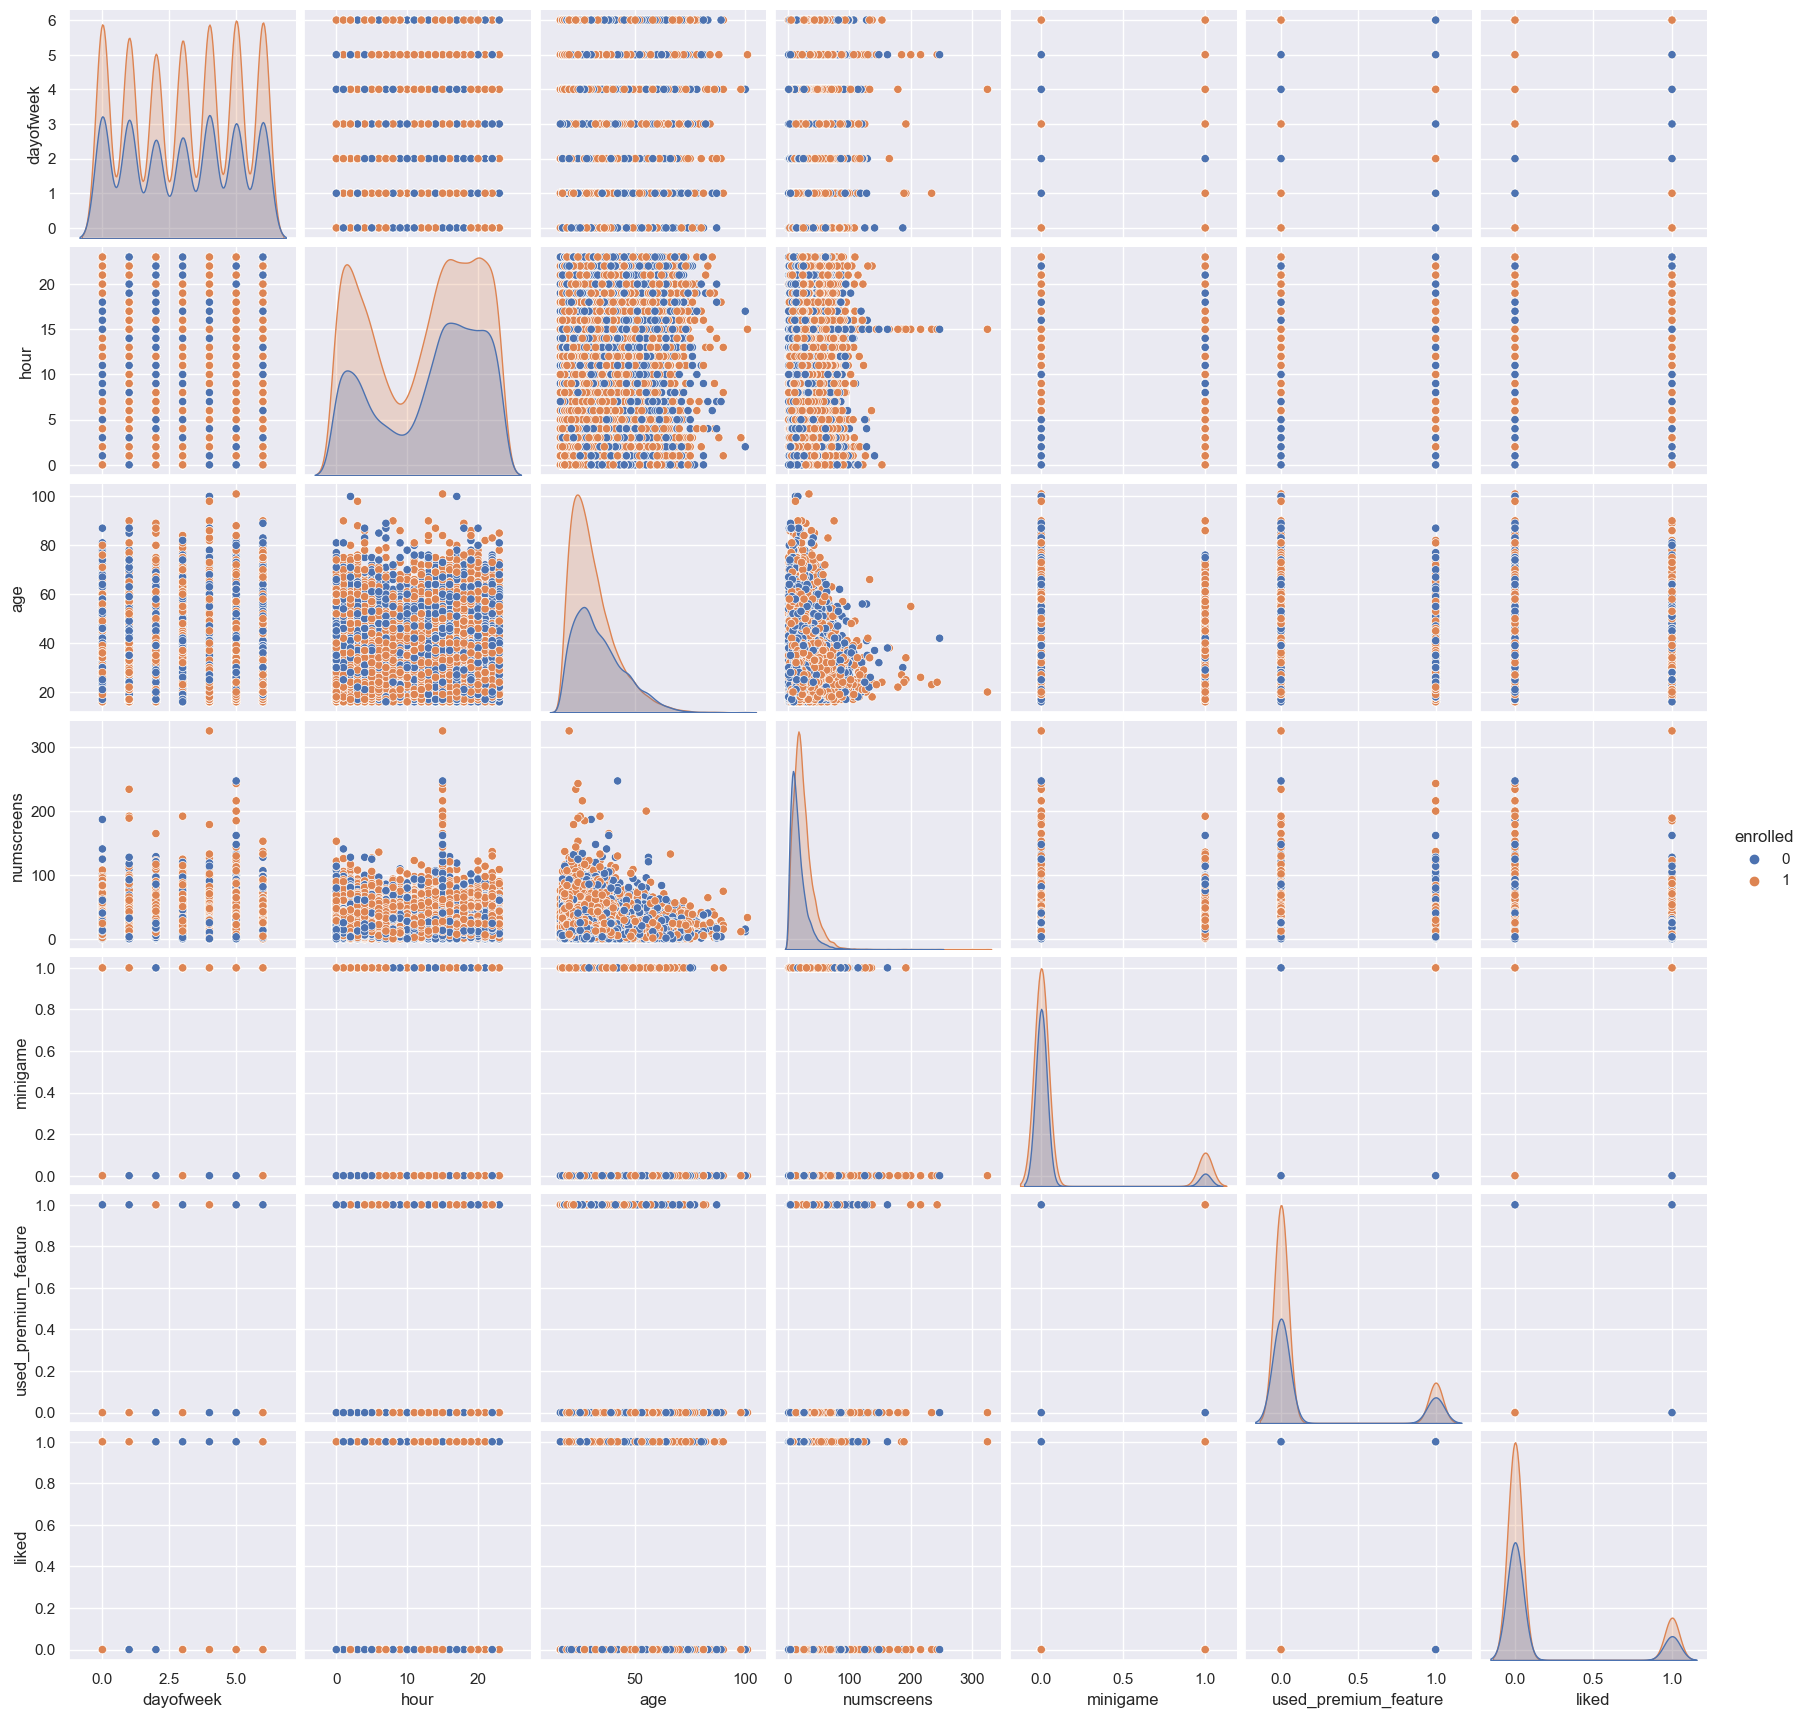

In [276]:

# Pailplot of fineTech_appData2 Dataset
 
#%matplotlib qt5 # for show graph in seperate window
sns.pairplot(finTech_appData2, hue  = 'enrolled')

In pair plot we can,see the maximum features have two values like 0 and 1 and orange dots show the enrolled customers features. so we visualize the c ounterplot of enrolled data

# Countplot of enrolled

C:\Users\qavia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled', ylabel='count'>

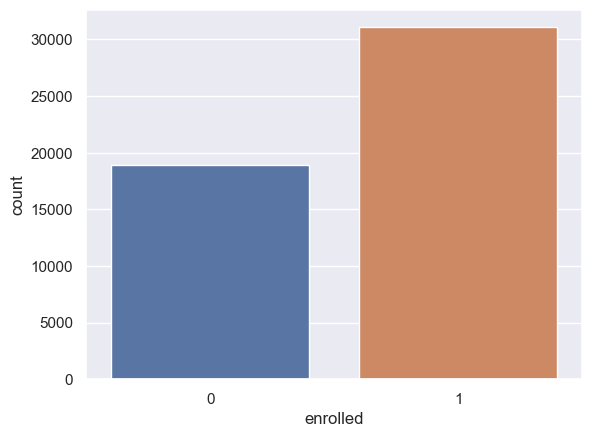

In [277]:
sns.countplot(finTech_appData.enrolled)

In [278]:
# value enrolled and not enrolled customers
print("Not Enrolled user = ", (finTech_appData.enrolled < 1).sum(), "out of 50000")
print("Enrolled     user = ",50000- (finTech_appData.enrolled <1).sum(),  "out of 50000")

Not Enrolled user =  18926 out of 50000
Enrolled     user =  31074 out of 50000



# Histogram


Histogram of each feature of finTech_appData2


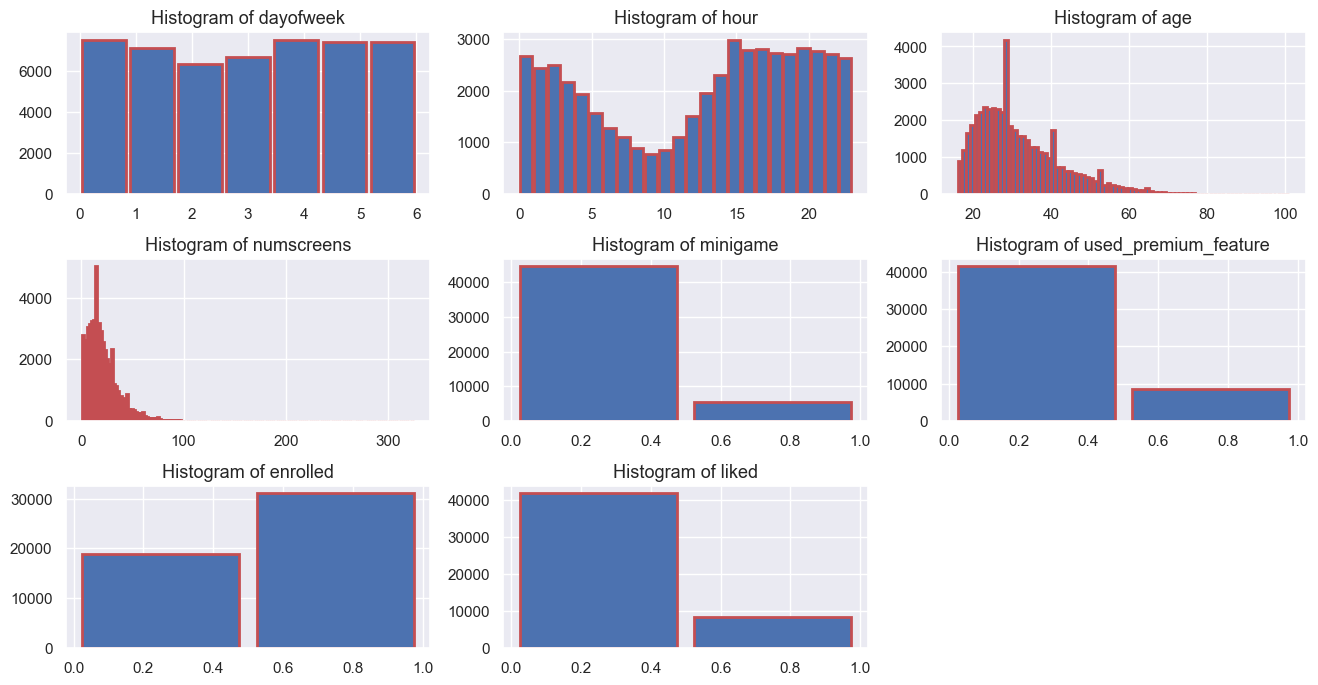

In [279]:
plt.figure(figsize=(16,8))
features=finTech_appData2.columns
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    plt.title("Histogram of {}".format(j),fontsize=13)
    bins=len(finTech_appData2[j].unique()  )
    plt.hist(  finTech_appData2[j],  bins=bins , rwidth=0.9,  edgecolor='r',  linewidth=2,  )
    plt.subplots_adjust(hspace=0.4) #spaces between horizontal axis 

In above histogram we can observe  
minigame ,used_premium_feature,enrolled and like they have only two values and how they distributed 

the histogram illustrate that

1.'dayofweek' shows on tuesday and wednesday slightly fewer customer registered the app 

2.'hour' shows the less customer register on the app areoung 10 am

3.'age ' histogram show the maximum customer are younger people age btw 21-30

4.'numscreens'' histogram show the few customer saw more then 40 screens

for i,j in enumerate(features):
    print(i,j)

finTech_appData2.head()

finTech_appData3.head()

# correlation bar plot with enrolled feature

C:\Users\qavia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


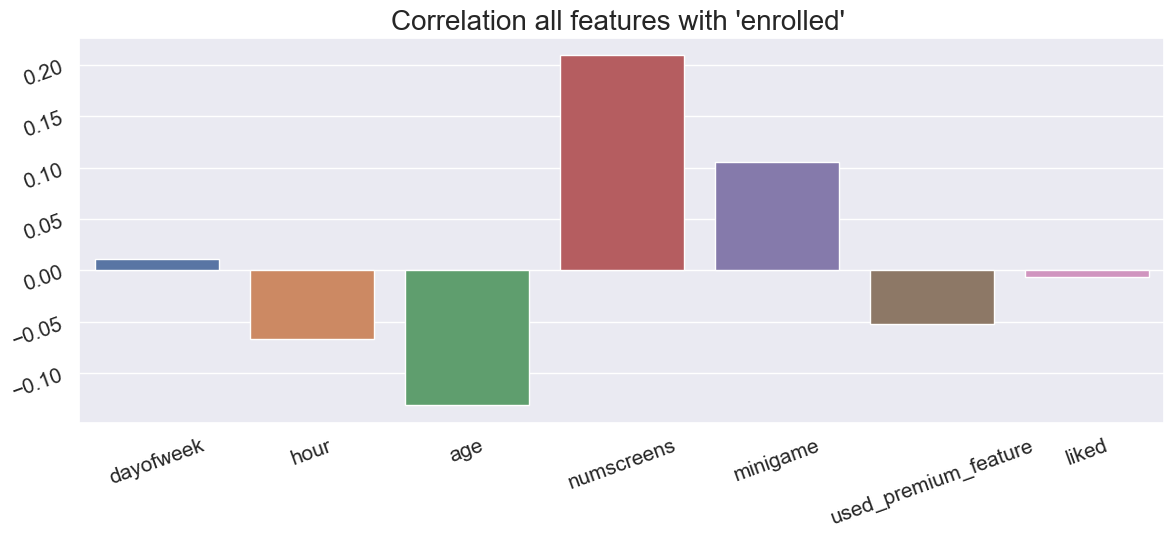

In [280]:
# show corelation barplot 
import seaborn as sns
sns.set() # set background dark grid

plt.figure(figsize = (14,5))

plt.title("Correlation all features with 'enrolled' ", fontsize = 20)

finTech_appData3=finTech_appData2.drop( ["enrolled"],axis=1) # drop 'enrolled' feature

ax =sns.barplot( finTech_appData3.columns ,  finTech_appData3.corrwith(finTech_appData2.enrolled))     # plot barplot 

ax.tick_params(labelsize=15, labelrotation = 20, color ="r") # decorate x & y ticks font


We saw the heatmap correlation matrix but this was not showing correlation 
clearly but you can easily understand which feature is how much correlated with ‘enrolled’ feature using the above barplot.

The ‘numscreens’ and ‘minigame’ is strongly positively correlated with ‘enrolled’ feature than other feature.

The ‘hour’, ‘age’ and ‘used_premium_feature’ are strongly negatively correlated with the ‘enrolled’ feature.

In [281]:
finTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [282]:
#if the data type is not have been converted in datetime format then i would have use thi
finTech_appData['first_open'] =[parser.parse(i) for i in finTech_appData['first_open']]
 
finTech_appData['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in finTech_appData['enrolled_date']]


In [283]:
finTech_appData.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

We are finding how much time the customer takes to get enrolled in the premium feature app after registration.
For that subtract ‘fineTech_appData.first_open’ from ‘fineTech_appData.enrolled_date’ and 
set data type as timedelta64 in hours.

In [284]:

finTech_appData['time_to_enrolled']  = (finTech_appData.enrolled_date - finTech_appData.first_open).astype('timedelta64[h]')


(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <BarContainer object of 10 artists>)

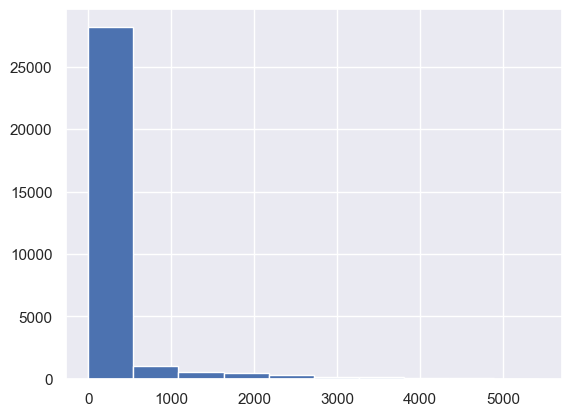

In [285]:
plt.hist(finTech_appData['time_to_enrolled'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

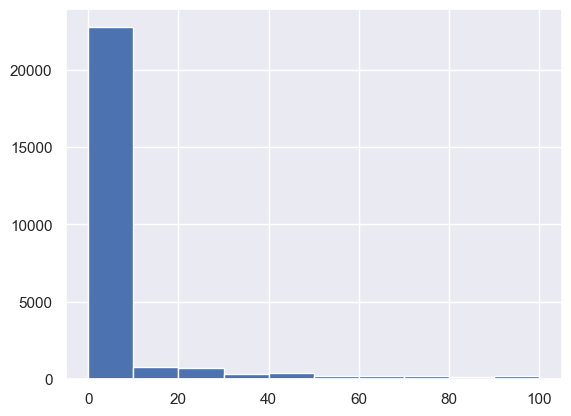

In [286]:
plt.hist(finTech_appData['time_to_enrolled'].dropna(),range=(0,100))

In [287]:
finTech_appData.head()


,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


In the above histogram, we know the maximum customers have enrolled the app in 10 hours from the registration.

# Feature selection

We are considering those customers have enrolled after 48 hours as 0

In [288]:
finTech_appData.loc[ finTech_appData.time_to_enrolled > 48,'enrolled']=0
finTech_appData.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


In [289]:
finTech_appData.drop(columns=['first_open','enrolled_date','time_to_enrolled'],inplace=True)

In [290]:
finTech_appData

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


## here we upload new file "top_screens.csv"

In [291]:
finTech_app_screen_Data=pd.read_csv("top_screens.csv")
finTech_app_screen_Data.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [292]:
finTech_app_screen_Data=pd.read_csv("top_screens.csv").top_screens.values
finTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [293]:
type(finTech_app_screen_Data)


numpy.ndarray

In [294]:
#add ',' at end of the each string of 'screen_list' for further operation

In [295]:

finTech_appData['screen_list'] = finTech_appData.screen_list.astype(str) + ','

# #The ‘Screen_list’ contains string values but we can’t use it directly. 


#So to solve this problem we are taking each screen name from ‘finTech_app_screen_Data’ and 
append as a column by the same name to ‘finTech_appData’
Then check this screen name is available in ‘screen_list’ 

if it is available then add value 1 else 0 in the appended column.

In [296]:
# string into to number
for screen_name in finTech_app_screen_Data:
    finTech_appData[screen_name] = finTech_appData.screen_list.str.contains(screen_name).astype(int)
    finTech_appData['screen_list'] = finTech_appData.screen_list.str.replace(screen_name+",", "")

In [297]:
finTech_appData.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [298]:
finTech_appData.screen_list.str.contains('Splash').astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: screen_list, Length: 50000, dtype: int32

In [299]:
finTech_appData.screen_list.str.replace('Splash'+",","")

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
                               ...                        
49995    Home,ScanPreview,VerifySSN,product_review,prod...
49996                                                Home,
49997    joinscreen,product_review,product_review2,Scan...
49998    Home,product_review,product_review,product_rev...
49999    product_review,ScanPreview,ProfileVerifySSN,Pr...
Name: screen_list, Length: 50000, dtype: object

In [300]:

# get shape
finTech_appData.shape

(50000, 68)

In [301]:
# head of DataFrame
finTech_appData.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [302]:
# remain screen in 'screen_list'
finTech_appData.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [303]:
# count remain screen list and store counted number in 'remain_screen_list'
 
finTech_appData.screen_list.str.count(",").head(6)


0     7
1     5
2     0
3     6
4    10
5     6
Name: screen_list, dtype: int64

In [304]:
finTech_appData['remain_screen_list']=finTech_appData.screen_list.str.count(",")

In [305]:
finTech_appData.drop(columns=['screen_list'],inplace=True)

In [306]:
finTech_appData

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13


In [307]:
finTech_appData.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [308]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
finTech_appData['saving_screens_count'] = finTech_appData[saving_screens].sum(axis = 1)
finTech_appData.drop(columns = saving_screens, inplace = True)


In [309]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
finTech_appData['credit_screens_count'] = finTech_appData[credit_screens].sum(axis = 1)
finTech_appData.drop(columns = credit_screens, axis = 1, inplace = True)

In [310]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
finTech_appData['cc_screens_count'] = finTech_appData[cc_screens].sum(axis = 1)
finTech_appData.drop(columns = cc_screens, inplace = True)

In [311]:
finTech_appData.shape

(50000, 53)

In [312]:
finTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   Loan2                    50000 non-null  int32
 10  location                 50000 non-null  int32
 11  Institutions             50000 non-null  int32
 12  VerifyPhone              50000 non-null  int32
 13  BankVerification         50000 non-null  int32
 14  VerifyDateOfBirth        50000 non-null  int32
 15  Pr

In [313]:
finTech_appData.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.506380,...,0.014220,0.016180,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499964,...,0.118398,0.126169,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000


<AxesSubplot:>

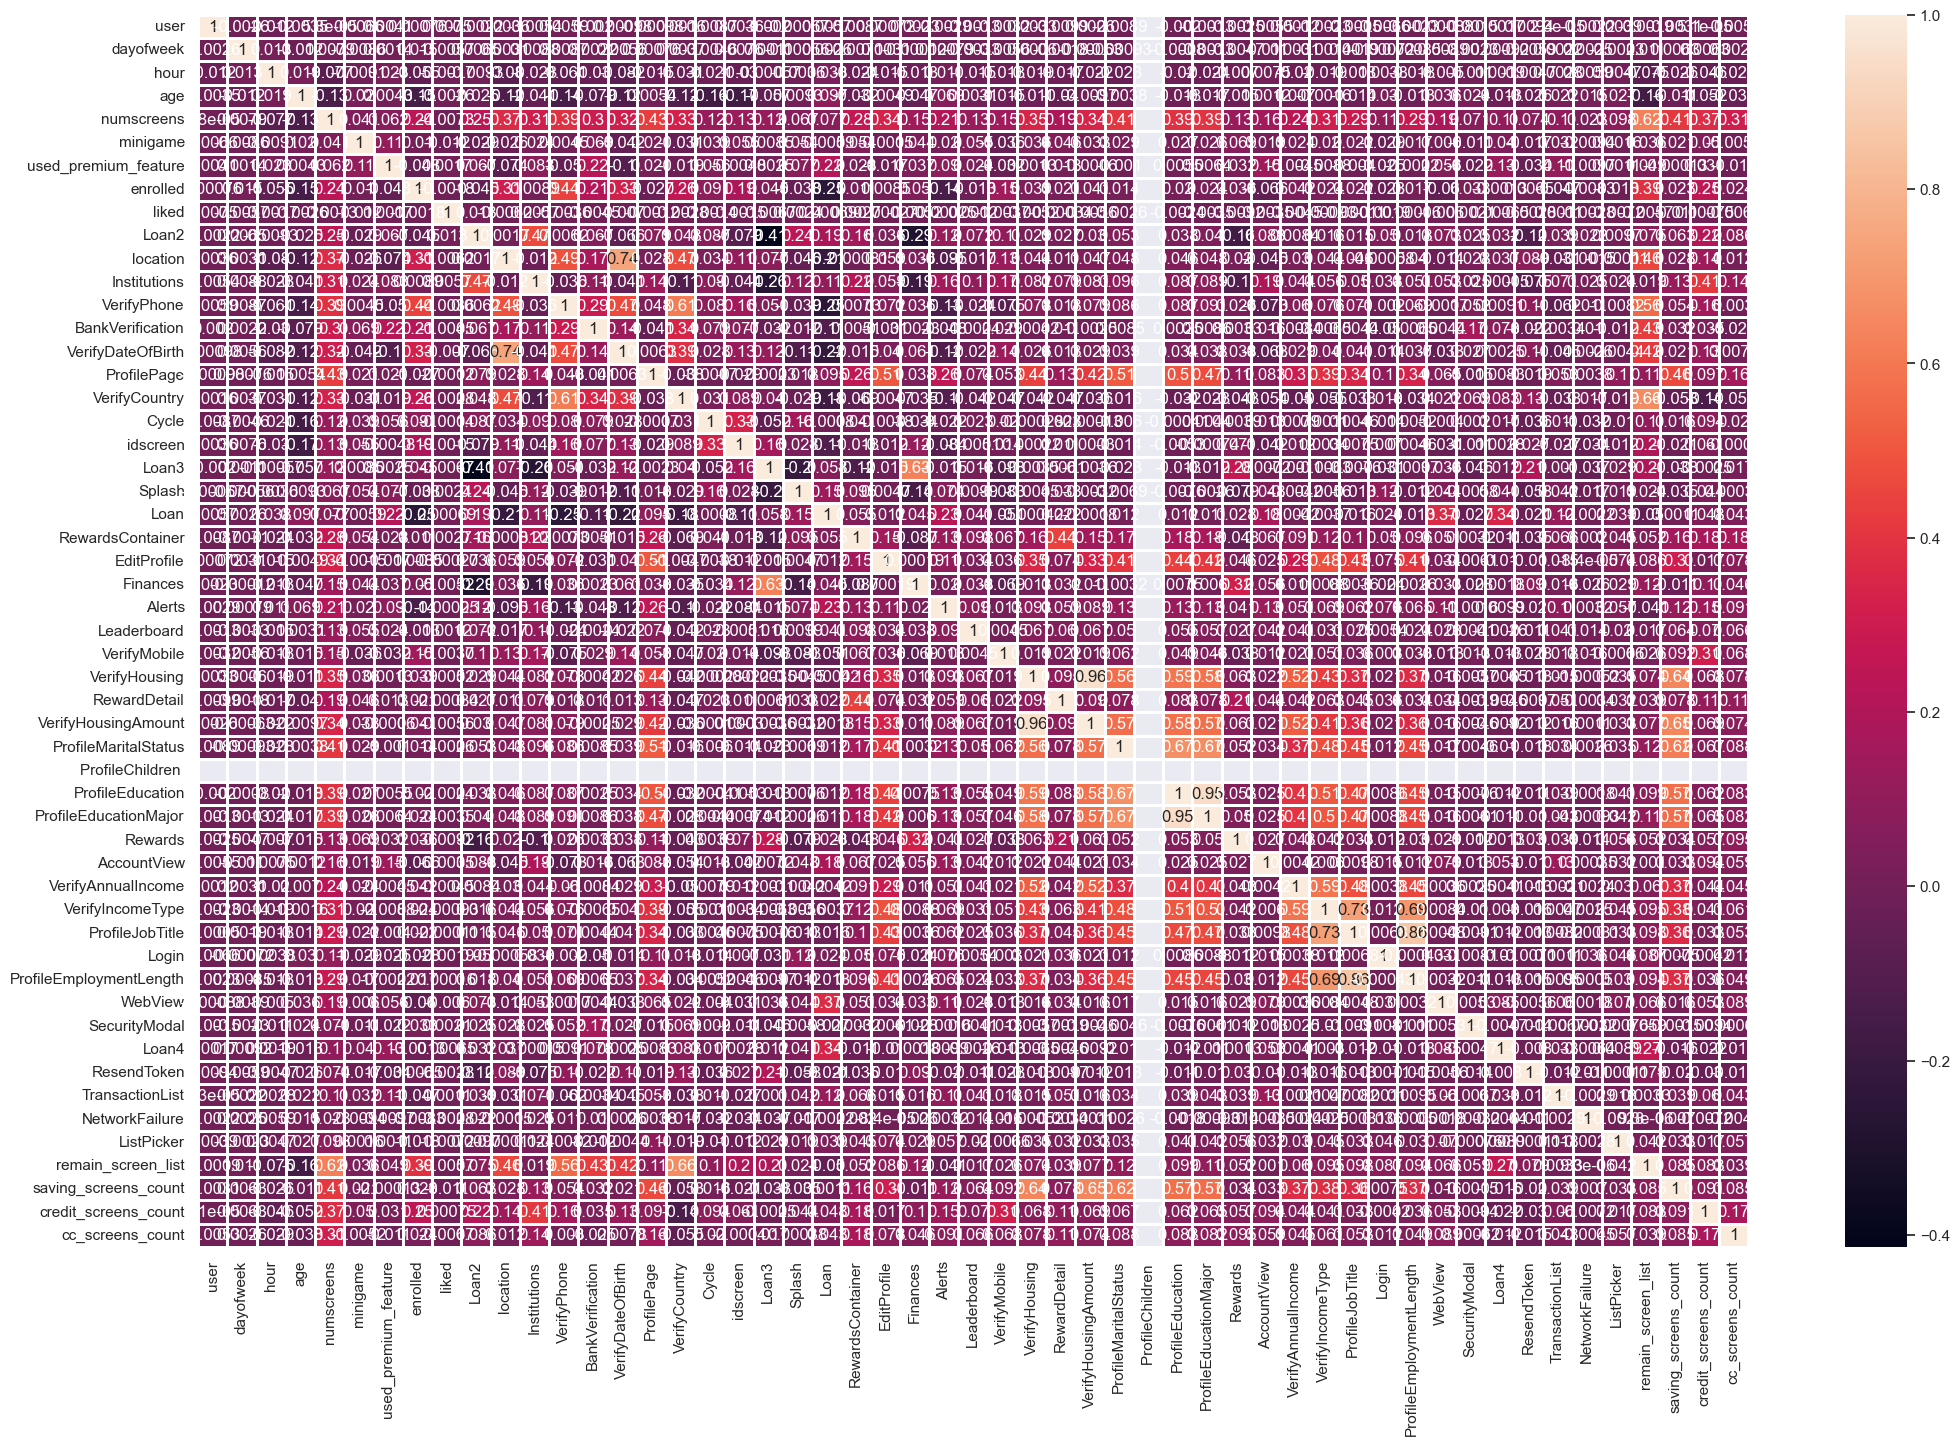

In [314]:
plt.figure(figsize=(25,16))
sns.heatmap(finTech_appData.corr(),annot=True,linewidth=2)